# ICPE 638 HW1 - Spring 2025
## Exploratory Data Analysis for Consumer Data

**Name:** Clayton Elbel

**UIN:** 328003781

**Google Colab Link:**

Please follow the examples demonstrated in the class to carry out exploratory data analysis (EDA) for the consumer dataset.


Please submit your version of this python notebook in Canvas for grade.


In addition to showing the output of the EDA, you will need to include the following:


1. Two questions about the consumer data.

  Any reasonable questions about the consumer data. For instance, will high income consumers buy more? Is the spending score influenced more by the age or annual income?


2. Answers to the questions through the EDA and arguments to support them based on your findings.


3. An executive summary of your findings of no more than 3 paragraphs. Feel free to include extra plots and relevant information supporting your arguments (Optional).

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/jtao/AdvancedML/main/data/Mall_Customers.csv")

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Set style for better visualizations: Before we begin, we must make the plots and visualizations look professional and easier to interpret. Clayton's Note: lines apply a predefined style from the Seaborn library to all Matplotlib plots
sns.set_style("whitegrid") # This line sets the 'whitegrid' style using Seaborn's 'set_style' function.

sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

## Data Overview


In [ ]:
# Display first rows of the dataset
print("First 5 rows of the dataset:") #note: as a new Python coder, remember the print fxn is used as syntax telling us to provide a label for the data that follows. It helps create a more readable output by adding descriptive text before showing the actual data.
display(df.head())

First 5 rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Income Group
0,1,Male,19,15,39,16-25,Low (0-30k)
1,2,Male,21,15,81,16-25,Low (0-30k)
2,3,Female,20,16,6,16-25,Low (0-30k)
3,4,Female,23,16,77,16-25,Low (0-30k)
4,5,Female,31,17,40,26-35,Low (0-30k)


In [ ]:
# Check basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              200 non-null    int64   
 1   Gender                  200 non-null    object  
 2   Age                     200 non-null    int64   
 3   Annual Income (k$)      200 non-null    int64   
 4   Spending Score (1-100)  200 non-null    int64   
 5   Age Group               200 non-null    category
 6   Income Group            200 non-null    category
dtypes: category(2), int64(4), object(1)
memory usage: 8.8+ KB
None


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Age Group                 0
Income Group              0
dtype: int64


In [ ]:
# Check summary statistics
print("\nSummary Statistics:")
display(df.describe().T)


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


## Data Visualization and Exploration


### Distribution of Numerical Variables

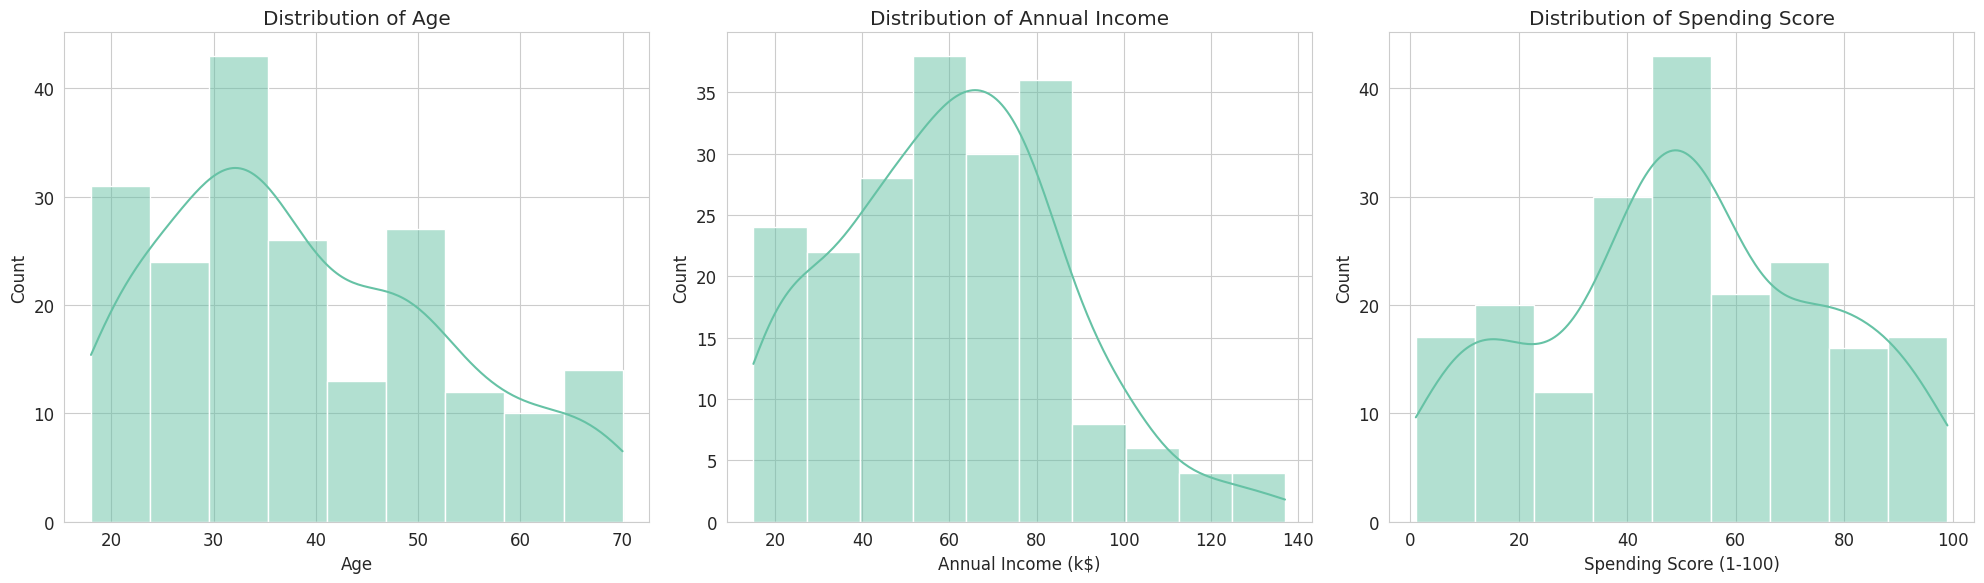

In [ ]:
# Create histograms for numeric variables
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')

sns.histplot(df['Annual Income (k$)'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Annual Income')
axes[1].set_xlabel('Annual Income (k$)')

sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axes[2])
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()

**Notes** **for** **Future** **Clayton** **on** **Visualization** **Approach**
We're using Seaborn's `histplot()` with custom subplots instead of the simpler `df.hist()` method for several reasons:

1. **Enhanced aesthetics**: Seaborn provides more professional-looking visualizations with better default settings
2. **Density curves**: Adding KDE curves (with `kde=True`) helps better visualize the underlying distributions
3. **Custom layout control**: Side-by-side arrangement makes direct comparison easier
4. **Consistent styling**: Creates visual harmony with other visualizations in our analysis
5. **Better customization**: Allows individual control of titles, labels, and other elements for each plot

### Gender Distribution


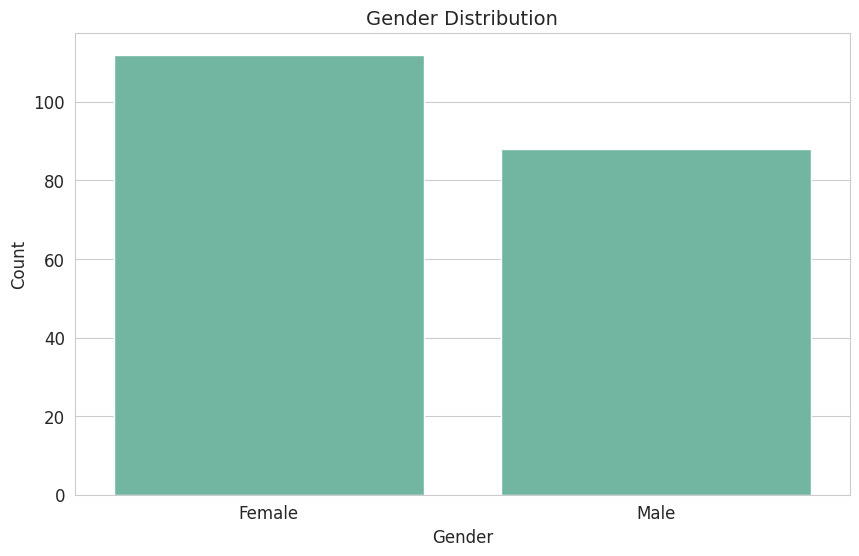

In [ ]:
# Plot gender distribution
plt.figure(figsize=(10, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

In [ ]:
# Display gender counts and percentages
print("Gender Distribution:")
display(pd.DataFrame({
    'Count': gender_counts,
    'Percentage (%)': (gender_counts / len(df) * 100).round(2)
}))

Gender Distribution:


,Count,Percentage (%)
Gender,,
Female,112,56.0
Male,88,44.0


**Gender** **Distribution** **Analysis**

Understanding the gender composition of our customer base is crucial for both analytical integrity and business insights. This analysis helps identify any sample bias that might affect our conclusions while also providing valuable context for consumer behavior patterns.

For this mall customer dataset specifically, the gender distribution reveals whether the mall attracts a balanced customer base or if it tends to attract more shoppers of a particular gender. This information can directly inform business decisions around merchandising, marketing campaigns, store layouts, and targeted promotions to either capitalize on existing customer demographics or develop strategies to attract underrepresented groups.


### Correlation Analysis

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

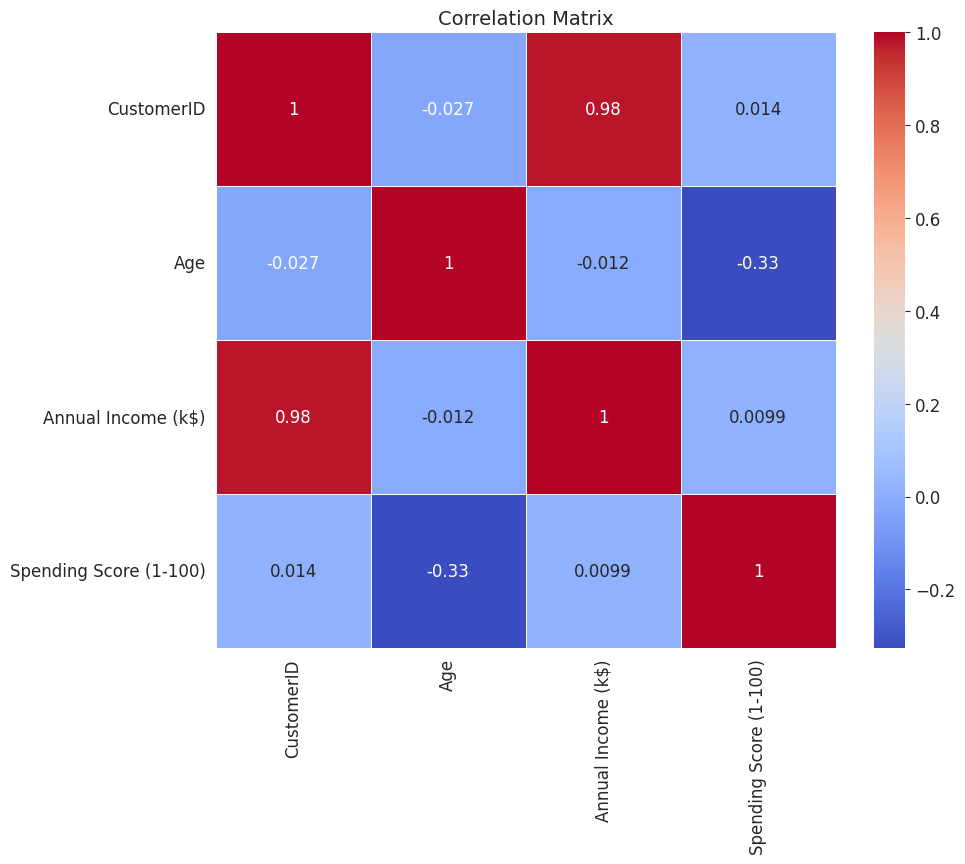

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

N**otes from class:** The correlation heatmap provides a visual representation of the relationships between all numeric variables in our dataset. The values range from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no correlation. Using a heatmap instead of just calculating correlation values makes patterns immediately visible through color intensity, allowing us to quickly identify the strongest relationships in the data. The color gradient (cool to warm) helps distinguish between positive and negative correlations, making this visualization more intuitive than a simple correlation table.

**Analysis:** In this specific example, the heatmap reveals ...
- Age shows a moderate negative correlation with Spending Score, suggesting younger customers tend to spend more
- Annual Income has a very weak correlation with Spending Score, indicating that higher income doesn't necessarily lead to higher spending in this mall
- CustomerID doesn't show meaningful correlations with other variables, as expected for an identifier column



### Relationship Between Variables

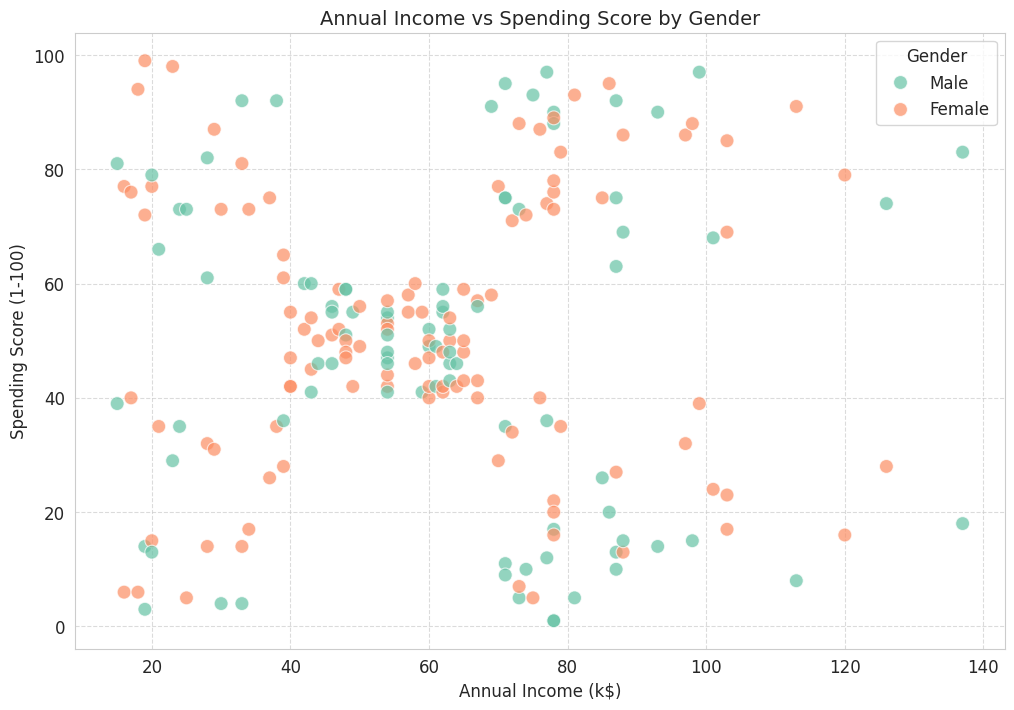

In [ ]:
# Creating a scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Gender', data=df, s=100, alpha=0.7)
plt.title('Annual Income vs Spending Score by Gender', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

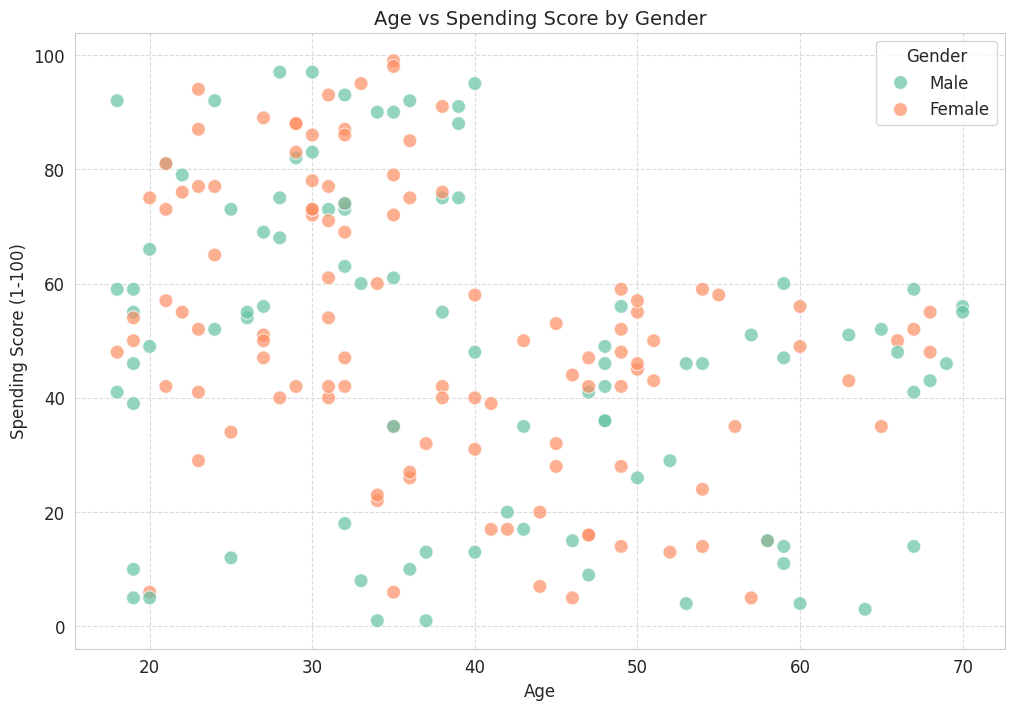

In [ ]:
# Creating a scatter plot of Age vs Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                hue='Gender', data=df, s=100, alpha=0.7)
plt.title('Age vs Spending Score by Gender', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Relationship Analysis: Scatter Plots**

These scatter plots reveal complex, non-linear relationships between our variables that weren't immediately apparent in the correlation matrix:

**Annual Income vs. Spending Score:**
The distribution shows an interesting pattern where both low-income and high-income customers exhibit high spending scores, while middle-income customers tend to have lower spending scores. This suggests a potential U-shaped relationship rather than a simple linear correlation. This non-linear pattern explains why the overall correlation coefficient is close to zero despite there being clear patterns in the data. The plot also reveals potential customer segments: high-income/high-spenders, high-income/low-spenders, low-income/high-spenders, and low-income/low-spenders.

**Age vs. Spending Score:**
This plot shows a general downward trend where younger customers tend to have higher spending scores, though with substantial variability. This aligns with the negative correlation we observed earlier. What's notable is that the highest spending scores are concentrated among customers under 40, while older customers show consistently lower spending patterns. There's no clear gender-based difference in this relationship, suggesting age influences spending behavior similarly across genders.

These visualizations highlight why simple correlation coefficients aren't always sufficient for understanding complex consumer behavior. The patterns suggest we may need to consider customer segmentation approaches rather than assuming uniform relationships across the entire customer base.

### Age Group Analysis


In [ ]:
# Create age groups
age_bins = [15, 25, 35, 45, 55, 65, 75]
age_labels = ['16-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

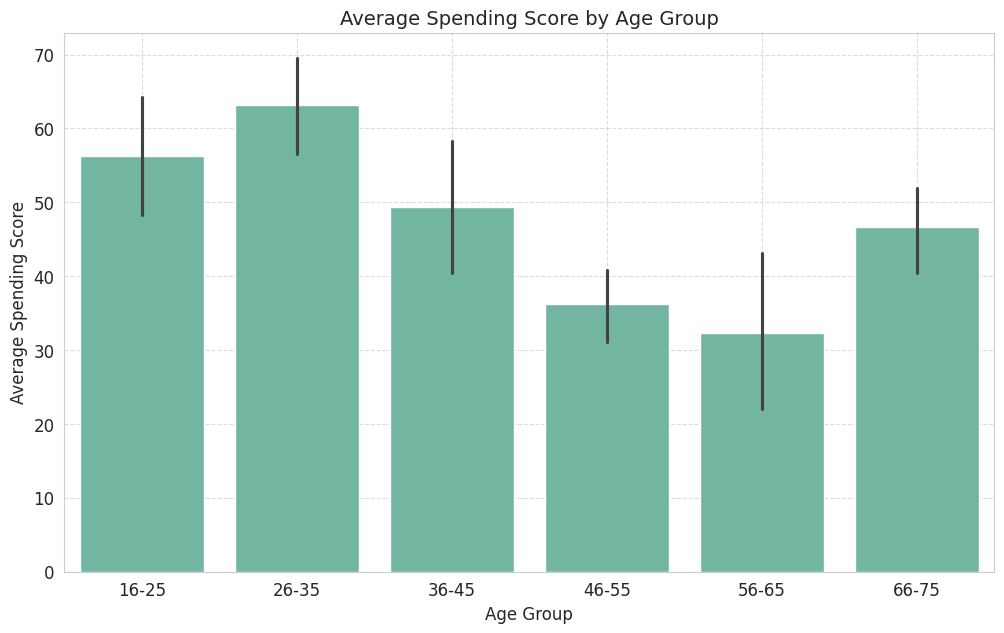

In [ ]:
# Average spending score by age group
plt.figure(figsize=(12, 7))
sns.barplot(x='Age Group', y='Spending Score (1-100)', data=df, errorbar=('ci', 95))
plt.title('Average Spending Score by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Spending Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

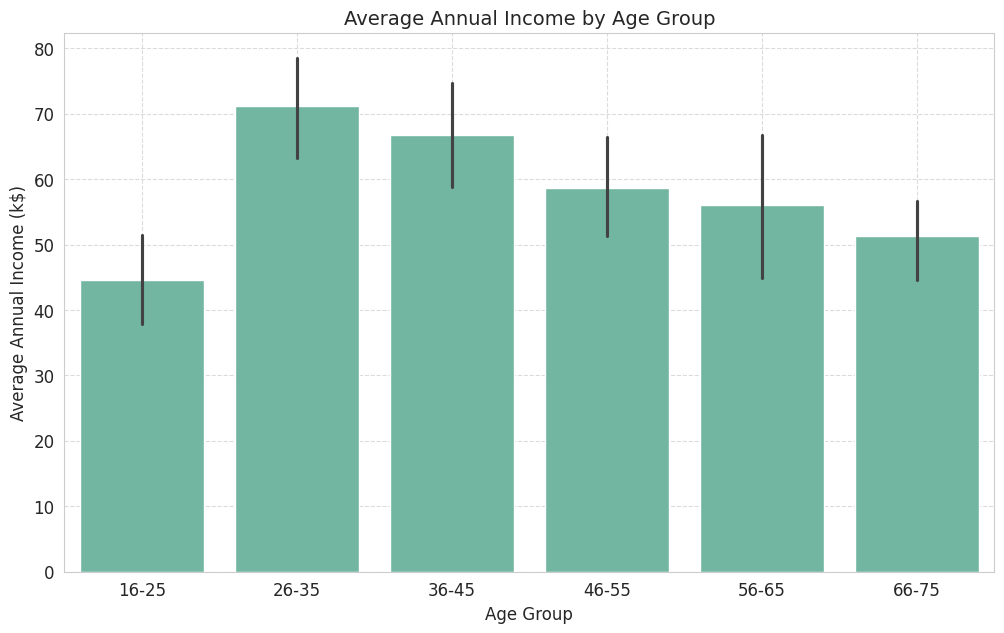

In [ ]:
# Average annual income by age group
plt.figure(figsize=(12, 7))
sns.barplot(x='Age Group', y='Annual Income (k$)', data=df, errorbar=('ci', 95))
plt.title('Average Annual Income by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Annual Income (k$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Analysis:** **Age Distribution Consideration**

Looking at the age distribution results, I notice the 26-35 age group appears overrepresented in our sample. This could influence our overall findings since this group also shows higher income and spending scores. I should be careful not to assume direct causal relationships without considering this sampling characteristic.

This demographic skew might affect the aggregate metrics and should be taken into account when interpreting spending patterns across different age segments. It would be useful to conduct within-group analysis to better understand if age truly drives spending behavior or if other factors are at play.

### Income Group Analysis


In [ ]:
# Create income groups
income_bins = [0, 30, 60, 90, 120, 150]
income_labels = ['Low (0-30k)', 'Lower-Mid (31-60k)', 'Upper-Mid (61-90k)', 'High (91-120k)', 'Very High (121k+)']
df['Income Group'] = pd.cut(df['Annual Income (k$)'], bins=income_bins, labels=income_labels, right=False)

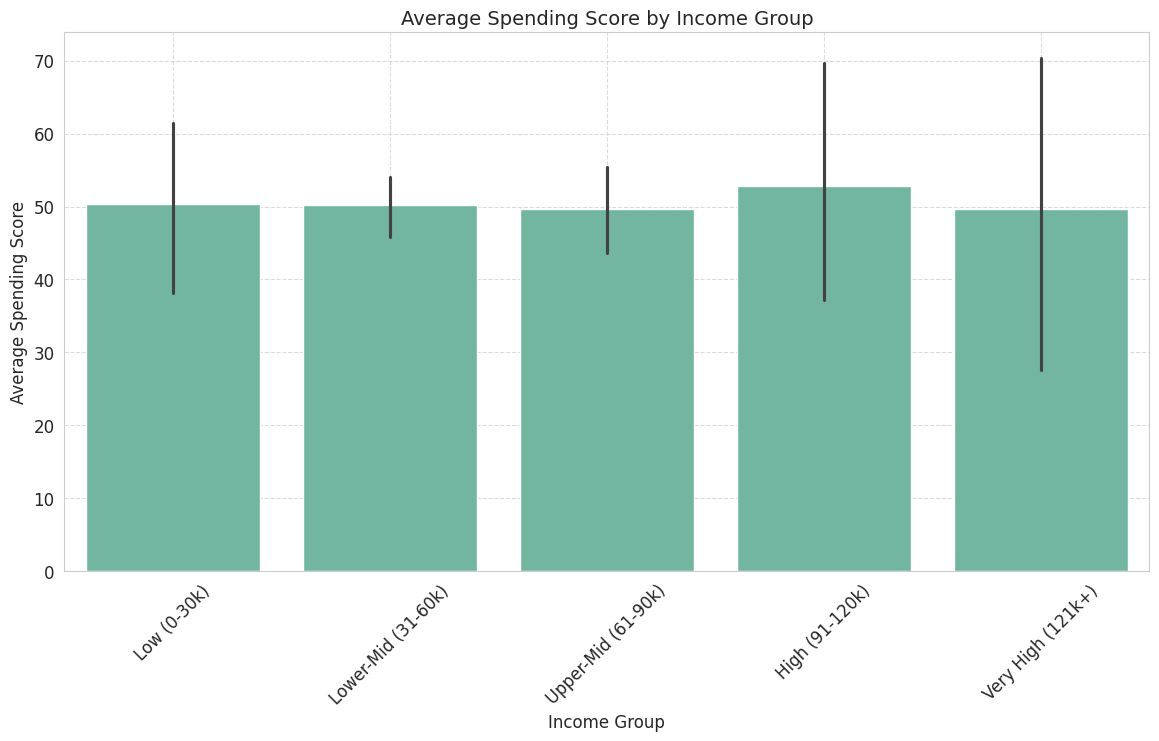

In [ ]:
# Average spending score by income group
plt.figure(figsize=(14, 7))
sns.barplot(x='Income Group', y='Spending Score (1-100)', data=df, errorbar=('ci', 95))
plt.title('Average Spending Score by Income Group', fontsize=14)
plt.xlabel('Income Group', fontsize=12)
plt.ylabel('Average Spending Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x1000 with 0 Axes>

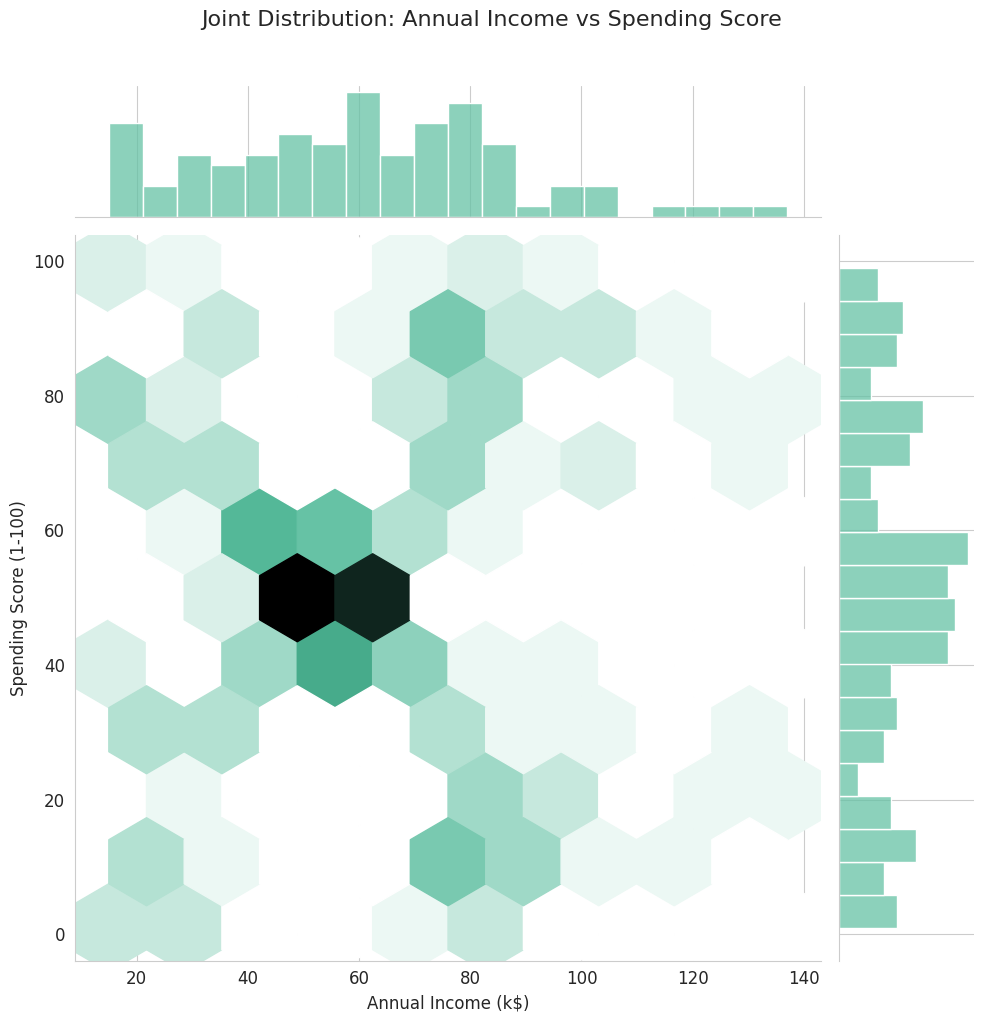

In [ ]:
# Joint distribution of Annual Income and Spending Score
plt.figure(figsize=(12, 10))
sns.jointplot(x='Annual Income (k$)', y='Spending Score (1-100)',
              data=df, kind='hex', height=10, ratio=5, marginal_kws={'bins': 20})
plt.suptitle('Joint Distribution: Annual Income vs Spending Score', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Income Group Analysis:** The hexbin plot reveals distinct customer clusters at both income extremes. We see high spenders among both low-income and high-income groups, with middle-income customers showing lower spending patterns. This multi-modal distribution explains why we didn't see a strong overall correlation between income and spending. The findings suggest a need for segment-specific marketing strategies.

### Gender-based Analysis


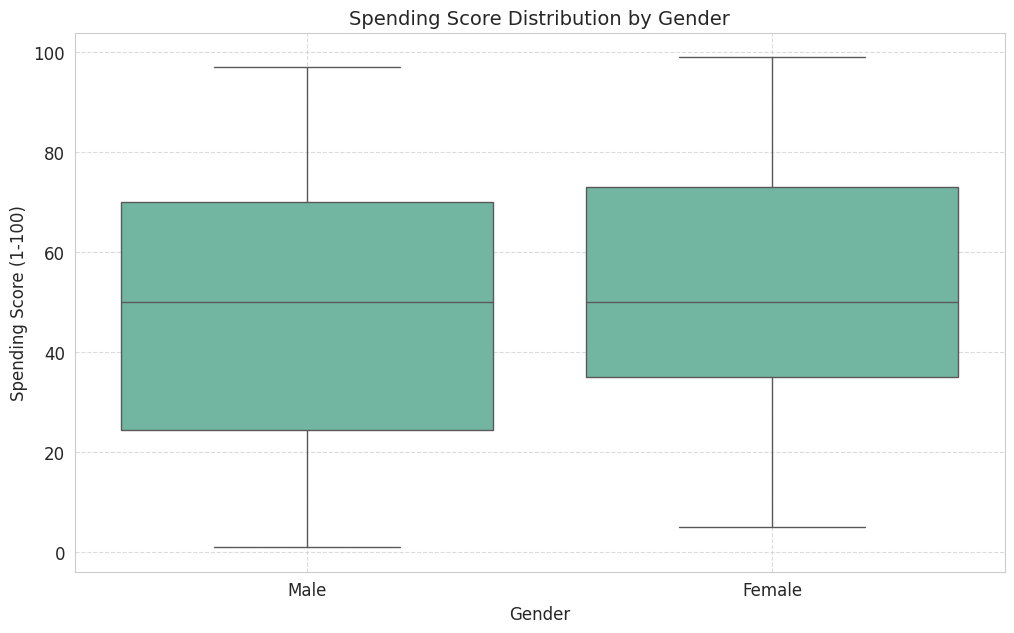

In [ ]:
# Spending patterns by gender
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

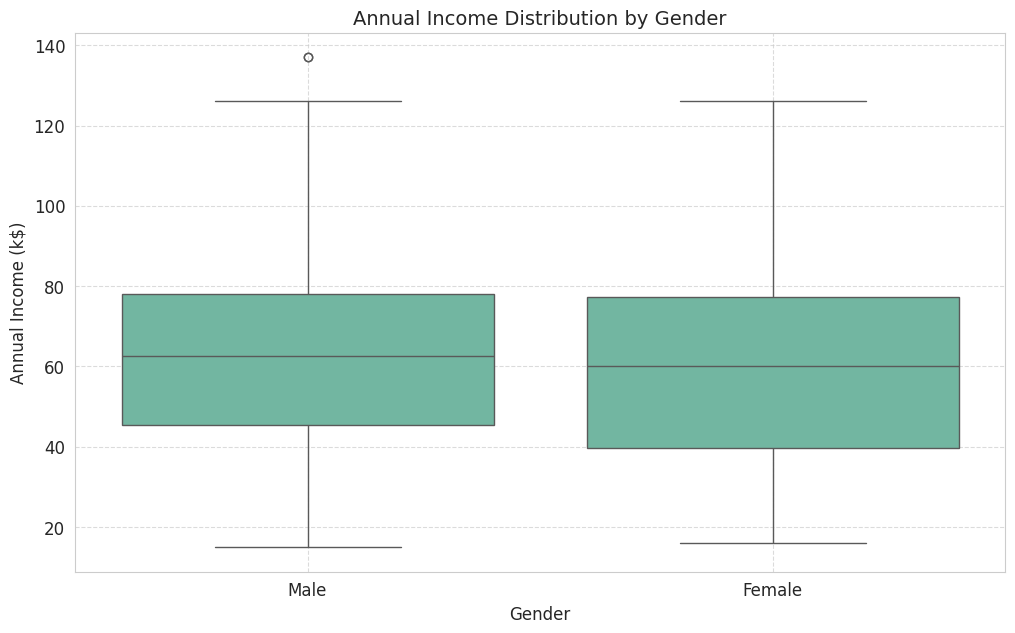

In [ ]:
# Income patterns by gender
plt.figure(figsize=(12, 7))
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Annual Income (k$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# T-test for gender differences in spending
female_spending = df[df['Gender'] == 'Female']['Spending Score (1-100)']
male_spending = df[df['Gender'] == 'Male']['Spending Score (1-100)']
t_stat, p_val = stats.ttest_ind(female_spending, male_spending)
print(f"T-test for gender difference in spending: t={t_stat:.3f}, p={p_val:.3f}")

T-test for gender difference in spending: t=0.819, p=0.414


In [ ]:
# T-test for gender differences in income
female_income = df[df['Gender'] == 'Female']['Annual Income (k$)']
male_income = df[df['Gender'] == 'Male']['Annual Income (k$)']
t_stat, p_val = stats.ttest_ind(female_income, male_income)
print(f"T-test for gender difference in income: t={t_stat:.3f}, p={p_val:.3f}")

T-test for gender difference in income: t=-0.795, p=0.428


**T-Test Results:** The t-tests show no statistically significant differences between male and female customers in either spending habits (p=0.414) or income levels (p=0.428), as both p-values are well above the conventional 0.05 threshold.

## Research Questions

### Question 1: Does high income correlate with higher spending scores?

In [ ]:
# Calculate correlation
income_spending_corr = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
print(f"Correlation between Annual Income and Spending Score: {income_spending_corr:.3f}")

Correlation between Annual Income and Spending Score: 0.010


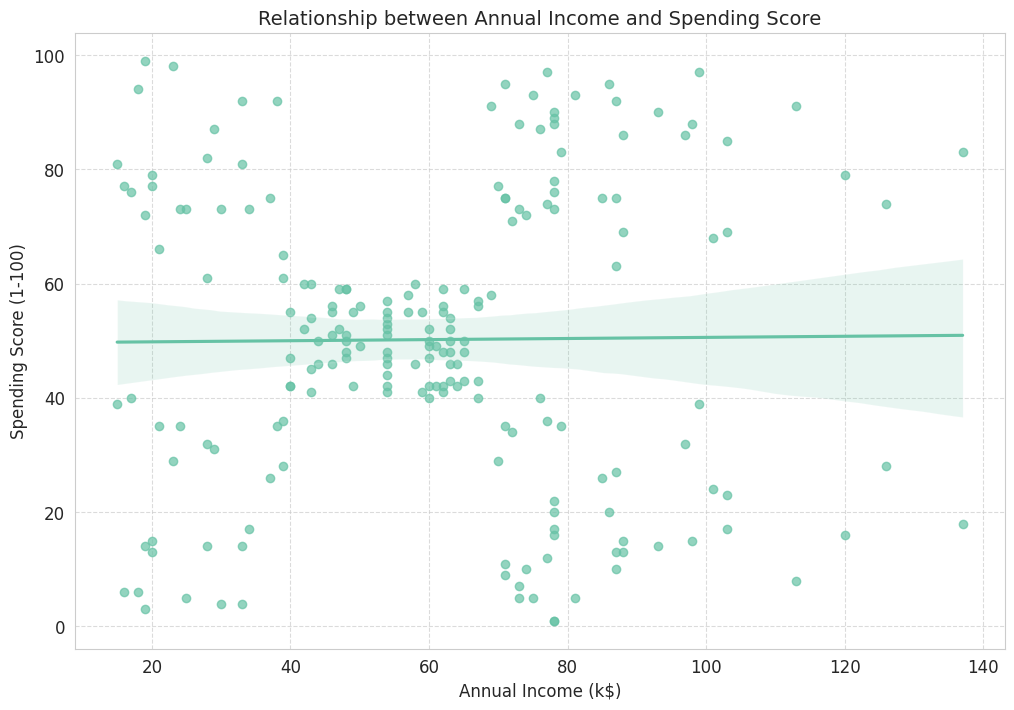

In [ ]:
# Regression plot
plt.figure(figsize=(12, 8))
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, scatter_kws={'alpha':0.7})
plt.title('Relationship between Annual Income and Spending Score', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Average spending score for each income group
income_group_spending = df.groupby('Income Group')['Spending Score (1-100)'].agg(['mean', 'std', 'count'])
income_group_spending.columns = ['Average Spending Score', 'Standard Deviation', 'Count']
print("\nSpending Score by Income Group:")
display(income_group_spending)


Spending Score by Income Group:


<ipython-input-39-d92cedcf8ea8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_group_spending = df.groupby('Income Group')['Spending Score (1-100)'].agg(['mean', 'std', 'count'])


,Average Spending Score,Standard Deviation,Count
Income Group,,,
Low (0-30k),50.400000,32.149007,30
Lower-Mid (31-60k),50.161290,16.300652,62
Upper-Mid (61-90k),49.697674,27.435945,86
High (91-120k),52.875000,33.893706,16
Very High (121k+),49.666667,32.153797,6


In [ ]:
# One-way ANOVA for spending score across income groups
f_stat, p_val = stats.f_oneway(
    df[df['Income Group'] == 'Low (0-30k)']['Spending Score (1-100)'],
    df[df['Income Group'] == 'Lower-Mid (31-60k)']['Spending Score (1-100)'],
    df[df['Income Group'] == 'Upper-Mid (61-90k)']['Spending Score (1-100)'],
    df[df['Income Group'] == 'High (91-120k)']['Spending Score (1-100)'],
    df[df['Income Group'] == 'Very High (121k+)']['Spending Score (1-100)']
)
print(f"ANOVA test for differences in spending across income groups: F={f_stat:.3f}, p={p_val:.3f}")


ANOVA test for differences in spending across income groups: F=0.051, p=0.995


**Is there a relationship?**

This analysis reveals virtually no linear relationship between income and spending score, as evidenced by the nearly flat regression line. The ANOVA test (p=0.995) strongly confirms there are no statistically significant differences in spending patterns across the five income groups, with all segments showing average spending scores around 50. This surprising finding challenges conventional assumptions that higher income leads to higher spending, suggesting that factors beyond financial capacity drive mall spending behavior.

### Question 2: Is the spending score influenced more by age or annual income?


In [ ]:
# Calculate correlations
age_spending_corr = df['Age'].corr(df['Spending Score (1-100)'])
income_spending_corr = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])

print(f"Correlation between Age and Spending Score: {age_spending_corr:.3f}")
print(f"Correlation between Annual Income and Spending Score: {income_spending_corr:.3f}")

Correlation between Age and Spending Score: -0.327
Correlation between Annual Income and Spending Score: 0.010


<Figure size 1500x1200 with 0 Axes>

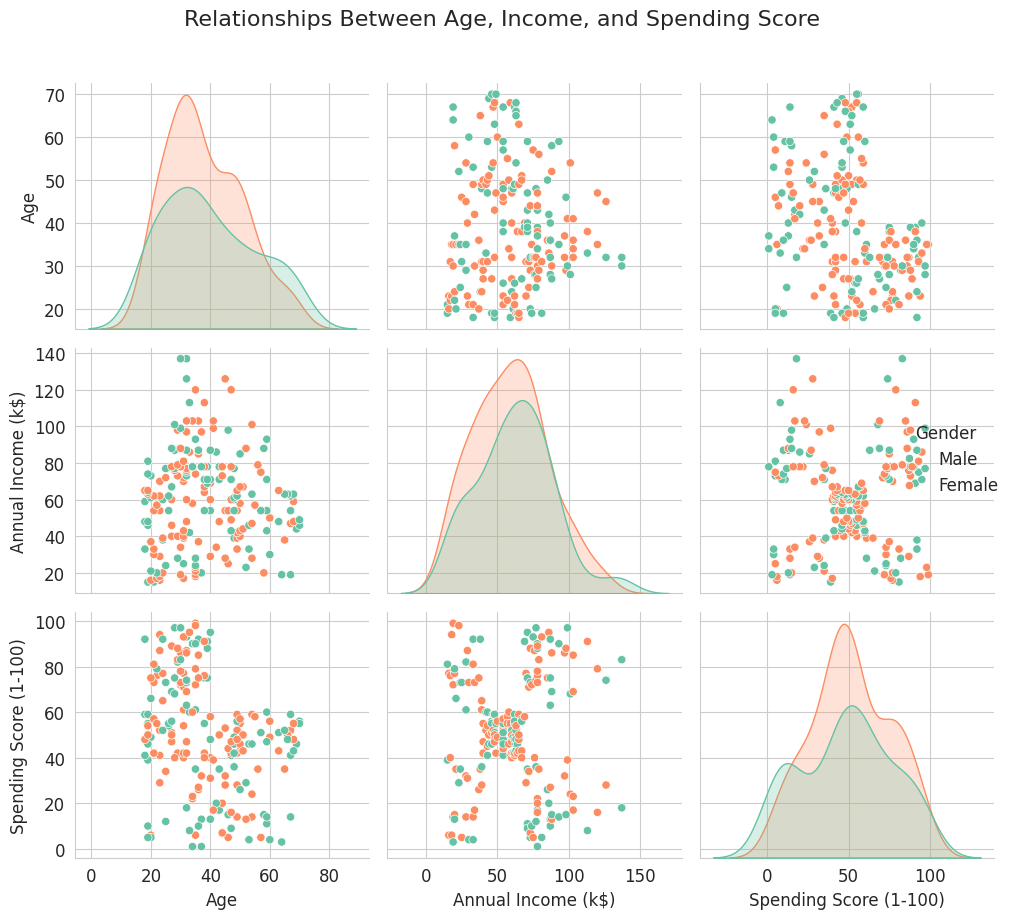

In [ ]:
# Create a pair plot to visualize relationships
plt.figure(figsize=(15, 12))
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']],
             hue='Gender', height=3, diag_kind='kde')
plt.suptitle('Relationships Between Age, Income, and Spending Score', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Linear regression for spending score vs age
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Model for Age vs Spending
X_age = df['Age'].values.reshape(-1, 1)
y = df['Spending Score (1-100)'].values
model_age = LinearRegression()
model_age.fit(X_age, y)
y_pred_age = model_age.predict(X_age)
r2_age = r2_score(y, y_pred_age)

In [ ]:
# Model for Income vs Spending
X_income = df['Annual Income (k$)'].values.reshape(-1, 1) # Reshape income data
model_income = LinearRegression()
model_income.fit(X_income, y)
y_pred_income = model_income.predict(X_income)
r2_income = r2_score(y, y_pred_income) # Calculate R-squared for income

In [ ]:
# Model for both Age and Income vs Spending
X_both = df[['Age', 'Annual Income (k$)']].values
model_both = LinearRegression()
model_both.fit(X_both, y)
y_pred_both = model_both.predict(X_both)
r2_both = r2_score(y, y_pred_both)
print(f"R² for Age vs Spending: {r2_age:.3f}")
print(f"R² for Income vs Spending: {r2_income:.3f}") # Now r2_income is defined
print(f"R² for both Age and Income vs Spending: {r2_both:.3f}")

R² for Age vs Spending: 0.107
R² for Income vs Spending: 0.000
R² for both Age and Income vs Spending: 0.107


In [ ]:
# Show regression coefficients
print("\nRegression Coefficients (both predictors):")
print(f"Age coefficient: {model_both.coef_[0]:.3f}")
print(f"Income coefficient: {model_both.coef_[1]:.3f}")
print(f"Intercept: {model_both.intercept_:.3f}")



Regression Coefficients (both predictors):
Age coefficient: -0.605
Income coefficient: 0.006
Intercept: 73.348


**Which variable has more of an influence on spending score?**

This analysis clearly shows that age has a much stronger influence on spending patterns than income does. The negative correlation (-0.327) and higher R² value (0.107) for age indicate that younger customers tend to spend more, with spending decreasing by about 0.6 points for each additional year of age. Income, with its near-zero correlation (0.010) and R² value (0.000), has virtually no effect on spending behavior, which is further confirmed by the combined model showing no improvement in explanatory power when income is added as a predictor.

## Executive Summary

Our exploratory analysis of mall customer data reveals several unexpected patterns that challenge conventional marketing assumptions. Most notably, annual income shows virtually no correlation with spending scores (0.010), which was confirmed through regression analysis (R²=0.000) and ANOVA testing (p=0.995). This surprising finding suggests that a customer's financial capacity does not determine their spending behavior at this mall, pointing to the importance of other potential omitted variables like shopping preferences and lifestyle choices in driving purchasing decisions.

Age emerged as the strongest predictor of spending behavior, with a moderate negative correlation (-0.327) and meaningful explanatory power (R²=0.107). Younger customers consistently demonstrate higher spending tendencies regardless of income level, with spending scores decreasing by approximately 0.6 points for each additional year of age. Gender analysis revealed no statistically significant differences in spending patterns between male and female customers (p=0.414), suggesting that gender-specific marketing strategies may be less effective than age-targeted approaches for this customer base.

The joint distribution analysis identified distinct customer clusters that wouldn't be apparent from correlation coefficients alone, indicating potential for segment-specific marketing. However, we should note potential sampling bias in our dataset, with the 26-35 age group being overrepresented, which may influence the overall patterns observed. Future research should address this limitation through more balanced sampling while exploring additional factors like shopping frequency, visit duration, and lifestyle preferences that might better explain the observed spending behaviors beyond demographic characteristics.